In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from string import punctuation

In [6]:
df = pd.read_csv("../profiles.csv")

This project is focused on data analysis and building of machine learning algorithms for the data points provided by OKCupid Company. 

Data set contains of several columns, where information about each individual OKCupid user are specified. 

In [7]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\r\n<br />\r\ni would love to t...,currently working as an international agent fo...,making people laugh.<br />\r\nranting about a ...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\r\...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\r\nhttp://b...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


Following columns in the data set contain NaN value:

In [8]:
df.isna().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

Here are the column names shown as a Pandas object:

In [9]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [10]:
#Unique fluently spoken languages from dataset
List_Fluently = []
for i in list(df.index.values):
    for index in range(len(str(list(df.loc[i][["speaks"]])[0]).split(","))):
        item = (str(list(df.loc[i][["speaks"]])[0]).split(","))[index].strip(" ")
        if "(fluently)" in item and item not in List_Fluently:
            List_Fluently.append(item)    

In [11]:
most_learned_in_US = ['spanish', 'french', 'german', 
                      'italian', 'japanese','chinese',
                      'arabic', 'russian', 'portuguese',
                      'latin', 'korean'
                     ]

In [12]:
# ## Number of fluently and okay spoken foreign languages that are the most learned in US
List_Num_Fluently = []
List_Num_Okay = []

for i in list(df.index.values):
    fluently = 0
    okay = 0
    for index in range(len(str(list(df.loc[i][["speaks"]])[0]).split(","))):
        item = (str(list(df.loc[i][["speaks"]])[0]).split(","))[index]
        item.strip(" ")
        if "(fluently)" in item and item.split()[0] in most_learned_in_US:
            fluently += 1
        elif "(okay)" in item and item.split()[0] in most_learned_in_US:
            okay += 1
    List_Num_Fluently.append(fluently)
    List_Num_Okay.append(okay)
    
    
    
Num_Fluently_Arr = np.array(List_Num_Fluently)
df = df.join(pd.DataFrame(data = Num_Fluently_Arr).rename(columns = { 0 : 'Num_Langs_Fluently'}))
Num_Okay_Arr = np.array(List_Num_Okay)
df = df.join(pd.DataFrame(data = Num_Okay_Arr).rename(columns = { 0 : 'Num_Langs_Okay'}))

## State codes

In [14]:
state_list = []
for i in list(df.index.values):
    state = str(list(df.loc[i][["location"]])[0]).split(",")[-1]
    state = state.strip(" ")
    state_list.append(state)
State_Arr = np.array(state_list)
df = df.join(pd.DataFrame(data = State_Arr).rename(columns = { 0 : 'State'}))

In [15]:
df[["State"]].value_counts().head(5)

State        
california       59855
new york            17
illinois             8
massachusetts        5
oregon               4
dtype: int64

0 : California

1 : Other State of US

2 : Other

In [16]:
states_to_code = ['california', 'new york', 'illinois', 'massachusetts', 'texas', 'michigan', 'oregon', 
                  'arizona', 'florida', 'minnesota', 'georgia', 'ohio', 'virginia', 'hawaii', 
                  'colorado', 'district of columbia', 'washington', 'utah', 
                  'north carolina', 'mexico', 'ireland', 'montana', 
                  'rhode island', 'pennsylvania', 'mississippi', 'west virginia', 
                  'louisiana', 'new jersey', 'wisconsin', 'nevada', 'connecticut', 'missouri', 
                  'tennessee', 'idaho']
state_codes = [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

list_unique_states = list(df.State.value_counts().to_dict().keys())
state_code_dict = {}

for index in range(len(list_unique_states)):
    state_code_dict.setdefault(list_unique_states[index], 2)
for i in range(len(states_to_code)):
    if states_to_code[i] in state_code_dict.keys():
        state_code_dict[states_to_code[i]] = state_codes[i]
print(state_code_dict)

{'california': 0, 'new york': 1, 'illinois': 1, 'massachusetts': 1, 'texas': 1, 'michigan': 1, 'oregon': 1, 'florida': 1, 'arizona': 1, 'minnesota': 1, 'ohio': 1, 'united kingdom': 2, 'spain': 2, 'district of columbia': 1, 'washington': 1, 'utah': 1, 'georgia': 1, 'hawaii': 1, 'virginia': 1, 'colorado': 1, 'nevada': 1, 'idaho': 1, 'mexico': 1, 'ireland': 1, 'wisconsin': 1, 'north carolina': 1, 'netherlands': 2, 'switzerland': 2, 'germany': 2, 'louisiana': 1, 'tennessee': 1, 'new jersey': 1, 'connecticut': 1, 'mississippi': 1, 'rhode island': 1, 'montana': 1, 'vietnam': 2, 'west virginia': 1, 'missouri': 1, 'pennsylvania': 1, 'canada': 2}


## City codes

In [17]:
City_List = []
for i in list(df.index.values):
    city = str(list(df.loc[i][["location"]])[0]).split(",")[0]
    city = city.strip(" ")
    City_List.append(city)
City_Arr = np.array(City_List)
df = df.join(pd.DataFrame(data = City_Arr).rename(columns = { 0 : 'City'}))

In [18]:
df[["City"]].value_counts().head(5)

City         
san francisco    31064
oakland           7214
berkeley          4212
san mateo         1331
palo alto         1064
dtype: int64

san francisco : 0

oakland : 1

berkeley : 2

san mateo : 3

palo alto : 4

other : 5


In [19]:
cities_to_code = ['san francisco', 'south san francisco', 'oakland', 'berkeley', 'san mateo', 'palo alto']
cities_codes = [0, 0, 1, 2, 3, 4]
list_unique_cities = list(df.City.value_counts().to_dict().keys())
city_code_dict = {}

for index in range(len(list_unique_cities)):
    city_code_dict.setdefault(list_unique_cities[index], 5)
for i in range(len(cities_to_code)):
    if cities_to_code[i] in city_code_dict.keys():
        city_code_dict[cities_to_code[i]] = cities_codes[i]
print(city_code_dict)

{'san francisco': 0, 'oakland': 1, 'berkeley': 2, 'san mateo': 3, 'palo alto': 4, 'alameda': 5, 'san rafael': 5, 'hayward': 5, 'emeryville': 5, 'redwood city': 5, 'daly city': 5, 'san leandro': 5, 'walnut creek': 5, 'vallejo': 5, 'menlo park': 5, 'richmond': 5, 'south san francisco': 0, 'mountain view': 5, 'novato': 5, 'burlingame': 5, 'pleasant hill': 5, 'castro valley': 5, 'stanford': 5, 'el cerrito': 5, 'pacifica': 5, 'martinez': 5, 'mill valley': 5, 'san bruno': 5, 'san pablo': 5, 'belmont': 5, 'albany': 5, 'san carlos': 5, 'benicia': 5, 'lafayette': 5, 'sausalito': 5, 'millbrae': 5, 'san anselmo': 5, 'el sobrante': 5, 'san lorenzo': 5, 'fairfax': 5, 'hercules': 5, 'pinole': 5, 'half moon bay': 5, 'fremont': 5, 'green brae': 5, 'orinda': 5, 'moraga': 5, 'larkspur': 5, 'corte madera': 5, 'belvedere tiburon': 5, 'atherton': 5, 'brisbane': 5, 'rodeo': 5, 'crockett': 5, 'el granada': 5, 'foster city': 5, 'kentfield': 5, 'woodacre': 5, 'east palo alto': 5, 'ross': 5, 'piedmont': 5, 'mon

## Job codes

In [20]:
job_code_dict = {
     np.nan : np.nan,
    'transportation' : 0, 
    'hospitality / travel' : 1,  
    'student' : 2,
    'artistic / musical / writer' : 3,
    'computer / hardware / software' : 4,
    'banking / financial / real estate' : 5,
    'entertainment / media' : 6,
    'sales / marketing / biz dev' : 7, 
    'medicine / health' : 8,
    'science / tech / engineering' : 9, 
    'executive / management' : 10,
    'education / academia' : 11, 
    'clerical / administrative' : 12,
    'construction / craftsmanship' : 13, 
    'political / government' : 14,
    'law / legal services' : 15, 
    'military' : 16,
    'unemployed' : 17,
    'retired' : 18,
    'rather not say' : 19,
    'other' :20
}

## Ethnicity Codes

'White' = 0
'Black or African American' = 1
'Asian white' = 2
'Asian black' = 3
'Hispanic or latino' = 4
'Pacific Islander'= 5
'Other' = 6

In [21]:
ethinicity_code_dict = {
         np.nan : np.nan,
        'asian, white' : 2, 
        'white' : 0,
        'asian, black, other' : 3,
        'white, other' : 0,
        'hispanic / latin, white' : 4, 
        'hispanic / latin' : 4,
        'pacific islander, white' : 5,
        'asian' : 2,
        'black, white' : 6,
        'pacific islander' : 5,
        'asian, native american' : 2,
        'asian, pacific islander' : 5,
        'black, native american, white' : 6,
        'middle eastern, other' : 6,
        'native american, white' : 0,
        'indian' : 3,
        'black' : 1,
        'black, native american, hispanic / latin, other' : 4,
        'black, native american, hispanic / latin' : 4,
        'asian, black, pacific islander' : 5,
        'asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, white, other' : 6,
        'other' : 6,
        'hispanic / latin, other' : 4, 
        'asian, black' : 3,
        'middle eastern, white' : 2,
        'native american, white, other' : 0,
        'black, native american' : 1,
        'black, white, other' : 6,
        'hispanic / latin, white, other' : 4, 
        'middle eastern' : 2, 
        'black, other' : 6,
        'native american, hispanic / latin, white' : 4,
        'black, indian' : 3,
        'indian, white, other' : 3,
        'middle eastern, indian, other' : 3,
        'black, native american, hispanic / latin, white, other' : 6,
        'pacific islander, hispanic / latin' : 6,
        'black, hispanic / latin, white' : 6, 
        'native american' : 0,
        'indian, white' : 3,
        'asian, white, other' : 2,
        'black, hispanic / latin' : 4,
        'asian, hispanic / latin, white' : 3,
        'middle eastern, hispanic / latin' : 3,
        'asian, black, native american, pacific islander, white' : 3,
        'middle eastern, indian' : 3,
        'asian, indian' : 3,
        'pacific islander, other' : 5,
        'black, native american, white, other' : 6,
        'black, pacific islander' : 5,
        'middle eastern, native american, white' : 0,
        'asian, native american, white, other' : 2,
        'pacific islander, hispanic / latin, white' : 5, 
        'indian, other' : 3,
        'asian, pacific islander, other' : 5,    
        'black, hispanic / latin, other' : 4,
        'asian, black, native american' : 3,
        'black, native american, hispanic / latin, white' : 6,
        'native american, hispanic / latin' : 4, 
        'indian, hispanic / latin' : 6,
        'native american, pacific islander' : 5,
        'asian, black, native american, hispanic / latin, white' : 6,
        'asian, black, white' : 6,
        'asian, black, native american, pacific islander, other' : 6,
        'middle eastern, hispanic / latin, white' : 6,
        'asian, pacific islander, white' : 5,
        'asian, native american, hispanic / latin, white, other' : 6,
        'asian, hispanic / latin' : 6,
        'asian, pacific islander, white, other' : 5,
        'middle eastern, white, other' : 2,
        'asian, pacific islander, hispanic / latin' : 6,
        'black, native american, indian, other' : 6,
        'native american, hispanic / latin, white, other' : 6,
        'black, native american, other' : 6, 
        'asian, other' : 6,
        'middle eastern, hispanic / latin, other' : 6,
        'pacific islander, hispanic / latin, white, other' : 6,
        'asian, black, hispanic / latin' : 6,
        'asian, pacific islander, hispanic / latin, white' : 6,
        'asian, black, native american, white' : 3,
        'asian, middle eastern, white, other' : 2,
        'native american, pacific islander, hispanic / latin' : 6,
        'asian, native american, white' : 2,
        'native american, pacific islander, hispanic / latin, white, other' : 6,
        'indian, pacific islander' : 3, 
        'asian, middle eastern, black' : 3,
        'asian, middle eastern, indian' : 3,
        'asian, middle eastern, white' : 2,
        'pacific islander, white, other' : 5,
        'black, pacific islander, hispanic / latin' : 5,
        'asian, middle eastern' : 2, 
        'asian, hispanic / latin, other' : 6,
        'middle eastern, black, native american, indian, white, other' : 6,
        'middle eastern, pacific islander, other' : 6,
        'middle eastern, black' : 3,
        'asian, indian, pacific islander' : 3,
        'black, native american, pacific islander' : 5,
        'native american, indian' : 3,
        'asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, white' : 6,
        'black, indian, other' : 3,
        'asian, middle eastern, indian, hispanic / latin, white, other' : 6,
        'middle eastern, black, white': 3,
        'asian, hispanic / latin, white, other' : 6,
        'native american, hispanic / latin, other' : 4,
        'middle eastern, black, pacific islander, white' : 3,
        'asian, black, native american, hispanic / latin' : 6,
        'native american, other' : 0, 
        'black, indian, white' : 6,
        'asian, native american, hispanic / latin, white' : 6,
        'black, native american, indian, white' : 6,
        'middle eastern, black, indian, pacific islander, hispanic / latin, white' : 6,
        'middle eastern, hispanic / latin, white, other' : 6, 
        'asian, black, native american, other' : 3,
        'native american, pacific islander, hispanic / latin, white' : 6,
        'asian, indian, other' : 3,
        'middle eastern, native american, hispanic / latin, white, other' : 6,
        'asian, middle eastern, black, pacific islander, hispanic / latin, white' : 6,
        'black, native american, pacific islander, hispanic / latin, white, other' : 6,
        'asian, middle eastern, native american, hispanic / latin, white' : 6,
        'asian, middle eastern, black, native american, pacific islander, hispanic / latin, white, other': 6,
        'asian, indian, white' : 3,
        'native american, pacific islander, white, other' : 5,
        'middle eastern, black, native american, indian, pacific islander, hispanic / latin, white' : 6,
        'asian, middle eastern, other' : 2, 
        'middle eastern, pacific islander' : 3,
        'asian, black, hispanic / latin, other' : 6,
        'asian, middle eastern, black, native american, hispanic / latin, white' : 6,
        'middle eastern, black, hispanic / latin' : 6,
        'black, pacific islander, white' : 5,
        'asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, other' : 6,    
        'middle eastern, black, native american, indian, hispanic / latin, white' : 6,
        'asian, pacific islander, hispanic / latin, white, other' : 6,
        'middle eastern, indian, white' : 3, 
        'asian, indian, white, other' : 3,
        'middle eastern, black, native american, white, other' : 3,
        'black, native american, pacific islander, other' : 5,
        'middle eastern, black, native american, white' : 3,
        'asian, indian, pacific islander, other' : 3,
        'asian, black, native american, white, other' : 3,
        'black, indian, hispanic / latin, white' : 6,
        'asian, middle eastern, black, native american, indian, pacific islander, white' : 3,
        'asian, black, pacific islander, hispanic / latin' : 6,
        'middle eastern, black, native american, indian, pacific islander, hispanic / latin, white, other' : 6,
        'asian, black, native american, indian' : 3,
        'asian, black, indian, hispanic / latin, other' : 6,
        'indian, hispanic / latin, other' : 6,
        'asian, indian, hispanic / latin' : 6,
        'asian, native american, pacific islander, white, other' : 5,
        'asian, black, native american, indian, hispanic / latin, white, other' : 6,
        'asian, indian, hispanic / latin, white' : 6,
        'pacific islander, hispanic / latin, other' : 6,
        'asian, indian, pacific islander, hispanic / latin, white, other' : 6,
        'indian, hispanic / latin, white' : 6,
        'asian, native american, pacific islander, hispanic / latin, white, other' : 6,
        'asian, pacific islander, hispanic / latin, other' : 6,
        'asian, black, hispanic / latin, white, other' : 6,
        'black, indian, hispanic / latin' : 6,
        'middle eastern, black, native american, hispanic / latin, white' : 6,
        'black, pacific islander, other' : 5,
        'black, native american, pacific islander, white' : 5,
        'asian, black, native american, pacific islander' : 3,
        'asian, indian, hispanic / latin, other' : 6,
        'middle eastern, native american' : 0,
        'middle eastern, native american, hispanic / latin' : 6,
        'black, hispanic / latin, white, other' : 4,
        'asian, native american, pacific islander, hispanic / latin, white' : 6,
        'asian, native american, hispanic / latin' : 6,
        'black, native american, indian, hispanic / latin, white, other' : 6,
        'asian, middle eastern, hispanic / latin, white' : 6,
        'black, native american, pacific islander, white, other' : 5,
        'native american, indian, pacific islander, hispanic / latin' : 6,
        'black, indian, white, other' : 6,
        'asian, middle eastern, native american, pacific islander, hispanic / latin, white, other' : 6,
        'native american, pacific islander, white' : 5,
        'middle eastern, indian, white, other' : 3,
        'asian, black, white, other' : 6,
        'middle eastern, native american, hispanic / latin, white' : 6,
        'indian, hispanic / latin, white, other' : 6,
        'asian, middle eastern, black, pacific islander' : 3,
        'asian, middle eastern, black, indian, pacific islander, hispanic / latin, white' : 6,
        'asian, middle eastern, indian, other' : 3,
        'asian, middle eastern, black, white, other' : 3,
        'black, native american, pacific islander, hispanic / latin, white' : 6,
        'black, native american, indian, pacific islander, hispanic / latin' : 6,
        'asian, black, pacific islander, white' : 5,
        'middle eastern, pacific islander, hispanic / latin' : 6,
        'black, native american, indian, white, other' : 6,
        'asian, black, hispanic / latin, white' : 6,
        'asian, black, native american, indian, pacific islander, white' : 3,
        'asian, black, native american, indian, pacific islander, hispanic / latin' : 6,
        'asian, middle eastern, hispanic / latin, white, other' : 6,
        'middle eastern, black, native american, indian' : 3,
        'asian, native american, pacific islander' : 5,
        'asian, black, native american, pacific islander, white, other' : 6,
        'asian, middle eastern, hispanic / latin' : 6,
        'asian, black, pacific islander, other' : 5,
        'asian, native american, indian, pacific islander, hispanic / latin, white' : 6,
        'middle eastern, native american, white, other' : 2,
        'asian, native american, hispanic / latin, other' :6,
        'native american, indian, white' : 3,
        'black, native american, pacific islander, hispanic / latin' : 6,
        'asian, native american, pacific islander, white' : 5,
        'black, native american, indian' : 3,
        'indian, pacific islander, hispanic / latin, white' : 6,
        'asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin' : 6,
        'asian, middle eastern, indian, hispanic / latin' : 6,
        'asian, middle eastern, native american, pacific islander, other' : 5,
        'black, native american, indian, pacific islander' : 3,
        'asian, middle eastern, native american, pacific islander, white, other' : 5,
        'asian, native american, other' : 2, 
        'middle eastern, black, other' : 3,
        'asian, black, pacific islander, hispanic / latin, white' : 6,
        'asian, middle eastern, native american, indian, pacific islander, hispanic / latin, white' : 6,
        'asian, native american, indian, pacific islander, hispanic / latin, white, other' : 6,
        'asian, middle eastern, black, pacific islander, hispanic / latin' : 6,
        'asian, black, pacific islander, white, other' : 5,
        'asian, black, indian' : 3
    }

# diet codes

        'anything'
        'mostly anything' 
        'strictly anything'
        'other' 
        'mostly other'  
        'strictly other
        'vegetarian'
        'mostly vegetarian' 
        'strictly vegetarian'
        'vegan' 
        'mostly vegan', 
        'strictly vegan'
        'halal'
        'mostly halal'
        'strictly halal' 
        'kosher
        'mostly kosher'
        'strictly kosher'

# Orientation

In [22]:
orient_code_dict = {
    'straight' : 0,
    'gay' : 1,
    'bisexual' : 2
                }

# Diet

In [23]:
diet_code_dict = {
         np.nan : np.nan,
        'anything' : 0,
        'mostly anything' : 1,
        'strictly anything' : 2,
        'other' : 3,
        'mostly other' : 4,
        'strictly other' : 5,
        'vegetarian' : 6,
        'mostly vegetarian' : 7,
        'strictly vegetarian' : 8,
        'vegan' : 9,
        'mostly vegan' : 10, 
        'strictly vegan' :11,
        'halal' : 12,
        'mostly halal' : 13,
        'strictly halal' : 14,
        'kosher' : 15,
        'mostly kosher' : 16,
        'strictly kosher' : 17
}

# drugs codes:
    'never' : 0, 
    'sometimes' : 1, 
    'often' :2

In [24]:
drugs_code_dict = {
    np.nan : np.nan,
    'never' : 0, 
    'sometimes' : 1, 
    'often' : 2    
}

# drinks codes:

    'not at all' : 0
    'rarely' : 1
    'socially' : 2 
    'often' : 3
    'very often' : 4
    'desperately' : 5

In [25]:
drinks_code_dict = {
    np.nan : np.nan,
    'not at all' : 0,
    'rarely' : 1,
    'socially' : 2, 
    'often' : 3,
    'very often' : 4,
    'desperately' : 5
}

 # smokes codes:
    'sometimes' : 2
    'no' : 0
    'when drinking': 1
    'yes' : 4
    'trying to quit' : 3

In [26]:
smokes_code_dict = {
    np.nan : np.nan,
    'no' : 0,
    'when drinking': 1,
    'sometimes' : 2,
    'trying to quit' : 3,
    'yes' : 4    
}

## education codes:

    elementary: 1
    secondary: 2
    post-secondary: 3
    PhD: 4

In [27]:
education_code_dict = {
     np.nan : np.nan,
     'working on college/university' : 2,
     'working on space camp' : 1,
     'graduated from masters program' : 3,
     'graduated from college/university' : 3,
     'working on two-year college' : 2,
     'graduated from high school' : 2,
     'working on masters program' : 2,
     'graduated from space camp' : 2,
     'college/university' : 3,
     'dropped out of space camp' : 1,
     'graduated from ph.d program' : 4,
     'graduated from law school' : 3,
     'working on ph.d program' : 3,
     'two-year college' : 3,
     'graduated from two-year college' : 3,
     'working on med school' : 2,
     'dropped out of college/university' : 2,
     'space camp' : 2,
     'graduated from med school' : 3,
     'dropped out of high school' : 1,
     'working on high school' : 1,
     'masters program' : 3,
     'dropped out of ph.d program' : 3,
     'dropped out of two-year college' : 2,
     'dropped out of med school' : 2,
     'high school' : 2,
     'working on law school' : 2,
     'law school' : 3,
     'dropped out of masters program' : 2,
     'ph.d program' : 4,
     'dropped out of law school' : 2,
     'med school' : 3
    }

# Sex Codes

In [28]:
sex_code_dict = {'m': 0, 'f': 1}

# Income Codes

In [29]:
df.income.value_counts()

-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64

In [30]:
income_code_dict = {
       -1 : 0,
    20000 : 1,
    30000 : 1,
    40000 : 1,
    50000 : 1,
    60000 : 2,
    70000 : 2,
    80000 : 2,
   100000 : 2,
   150000 : 3,
   250000 : 3,
   500000 : 3,
  1000000 : 3
}

# Body Type

In [31]:
body_code_dict = {
     np.nan : np.nan,
     'average'           : 6,
     'fit'               : 3,
     'athletic'          : 4,
     'thin'              : 1,
     'curvy'             : 8,
     'a little extra'    : 0,
     'skinny'            : 2,
     'full figured'      : 9,
     'overweight'        : 10,
     'jacked'            : 5,
     'used up'           : 7,
     'rather not say'    : 11
    }

# Relationship to pets

0 : like both cats and dogs

1 : like dogs

2 : like cats

3 : dislike both cats and dogs

In [32]:
pets_code_dict = {
    np.nan : np.nan,
    'likes dogs and likes cats' : 0,
    'likes dogs' : 1,                         
    'likes dogs and has cats' : 0,            
    'has dogs' : 1,                           
    'has dogs and likes cats' : 0,            
    'likes dogs and dislikes cats' : 1,       
    'has dogs and has cats' : 0,               
    'has cats' : 2,                          
    'likes cats' : 2,                         
    'has dogs and dislikes cats' : 1,         
    'dislikes dogs and likes cats' : 2,   
    'dislikes dogs and dislikes cats' : 3,    
    'dislikes cats' : 1,
    'dislikes dogs and has cats' : 2,         
    'dislikes dogs' : 2                      
}

# Offspring

doesn´t have a kids = 0,

doesn´t have kinds and don´t want them = 1,

doens´t have a kinds a want them = 2,

have kinds = 3

have kinds and do not want more = 4,

have kinds/have kinds and want more = 5,




 

In [33]:
offspring_code_dict = {
    np.nan : np.nan,
    'doesn&rsquo;t have kids' :  0,                       
    'doesn&rsquo;t have kids, but might want them'  : 2,     
    'doesn&rsquo;t have kids, but wants them' : 2,               
    'doesn&rsquo;t want kids' : 1,                              
    'has kids' : 3,                                            
    'has a kid' : 3,                                            
    'doesn&rsquo;t have kids, and doesn&rsquo;t want any' : 1, 
    'has kids, but doesn&rsquo;t want more' : 4,                
    'has a kid, but doesn&rsquo;t want more' : 4,               
    'has a kid, and might want more'   : 5,                    
    'wants kids' : 2,                                           
    'might want kids' : 2,                                        
    'has kids, and might want more' : 5,                        
    'has a kid, and wants more' : 5,                            
    'has kids, and wants more' : 5
    }

# Data cleaning and replacement of categorical data

## Columns of zodiac sign and religion are cleaned

In [34]:
cols_to_clear = ["religion", "sign"]
          
def clear_columns(dataframe, cols_list: list):
    for col in cols_list:
        new_column = str(col)+"_clear"
        dataframe[new_column] = dataframe.apply(lambda row: str(row[col]).split()[0], axis = 1)
    return dataframe

In [35]:
# Calling function to clear zodiac sign and religion column. 
#
clear_columns(df, cols_to_clear)
df.head(3)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,sign,smokes,speaks,status,Num_Langs_Fluently,Num_Langs_Okay,State,City,religion_clear,sign_clear
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\r\n<br />\r\ni would love to t...,currently working as an international agent fo...,making people laugh.<br />\r\nranting about a ...,"the way i look. i am a six foot half asian, ha...",...,gemini,sometimes,english,single,0,0,california,south san francisco,agnosticism,gemini
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\r\...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,cancer,no,"english (fluently), spanish (poorly), french (...",single,0,0,california,oakland,agnosticism,cancer
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,0,0,california,san francisco,nan,pisces


In [36]:
religion_code_dict = {
    'nan' : np.nan,
    np.nan : np.nan,
    'agnosticism' : 2,
    'other' : 1,
    'atheism' : 0, 
    'christianity' : 3,
    'catholicism' : 4,
    'judaism' : 5,
    'buddhism' : 6,
    'hinduism' : 7,
    'islam' : 8    
}

In [37]:
essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]

def clean_words(word_list: list):
    clean_word_list = [word.strip(punctuation) for word in word_list if word.strip(punctuation)]
    return clean_word_list
#
# Removing the NaNs. 
#
essays_only = df[essay_cols].replace(np.nan, '', regex=True)
#
# Removing break sign from text string. 
#
all_essays = (pd.DataFrame(essays_only.apply(lambda row: ' '.join(row).replace("<br",""), axis = 1))
              .rename(columns = {0:'essays_combined'})
             )
#
df = df.join(all_essays)
#
# Creating new columns
df['I_me_Freq'] = df.apply(lambda row: row['essays_combined'].count("I") + row['essays_combined'].count("me"), axis = 1)
df["num_words"] = df.apply(lambda row: len(clean_words(row['essays_combined'].split())), axis = 1)
df["essay_length_clean"] = df.apply(lambda row: len(" ".join(clean_words(row['essays_combined'].split()))), axis = 1)
df["essay_length_wo_spaces"] = df.apply(lambda row: len("".join(clean_words(row['essays_combined'].split()))), axis = 1)

## Transformation into numerical data

In [38]:
cols_to_code = ["income", "diet", "drugs", "drinks", "smokes", "orientation", 
                "education", "ethnicity", "job", "sex", "State", "City",
               "body_type", "pets", "religion_clear", "offspring"]
code_dicts = (income_code_dict, diet_code_dict, drugs_code_dict, drinks_code_dict, 
              smokes_code_dict, orient_code_dict, education_code_dict, ethinicity_code_dict,
              job_code_dict, sex_code_dict, state_code_dict, city_code_dict, body_code_dict, 
              pets_code_dict, religion_code_dict, offspring_code_dict
             )            

def code_columns(dataframe, cols_to_code_lst: list, code_dicts_tpl: tuple):
    for index, col in enumerate(cols_to_code_lst):
        new_column = str(col)+"_code"
        dataframe[new_column] = df.apply(lambda row: code_dicts_tpl[index][row[col]], axis = 1)
    return dataframe

In [39]:
code_columns(df, cols_to_code, code_dicts)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,education_code,ethnicity_code,job_code,sex_code,State_code,City_code,body_type_code,pets_code,religion_clear_code,offspring_code
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\r\n<br />\r\ni would love to t...,currently working as an international agent fo...,making people laugh.<br />\r\nranting about a ...,"the way i look. i am a six foot half asian, ha...",...,2.0,2.0,0.0,0,0,0,0.0,0.0,2.0,2.0
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\r\...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,1.0,0.0,1.0,0,0,1,6.0,0.0,2.0,2.0
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,3.0,NaN,NaN,0,0,0,1.0,2.0,NaN,NaN
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,2.0,0.0,2.0,0,0,2,1.0,2.0,NaN,1.0
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\r\nhttp://b...,i smile a lot and my inquisitive nature,...,3.0,3.0,3.0,0,0,0,4.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,NaN,NaN,socially,never,graduated from college/university,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,"i am told that people notice my smile, eyes an...",...,3.0,NaN,7.0,1,0,1,NaN,1.0,4.0,3.0
59942,24,fit,mostly anything,often,sometimes,working on college/university,i'm nick.<br />\r\ni never know what to write ...,currently finishing school for film production...,"<a class=""ilink"" href=""/interests?i=filmmaking...","dude, i don't know.",...,2.0,0.0,6.0,0,0,0,3.0,0.0,2.0,0.0
59943,42,average,mostly anything,not at all,never,graduated from masters program,"hello! i enjoy traveling, watching movies, and...","i'm a civil engineer, who enjoys helping the c...",- looking at things objectively<br />\r\n- get...,i'm quiet until i get used to the environment ...,...,3.0,2.0,13.0,0,0,0,6.0,NaN,3.0,0.0
59944,27,athletic,mostly anything,socially,often,working on college/university,"""all i have in this world are my balls and my ...","following my dreams...<br />\r\n""you got a dre...",listening,it used to be the hair until i mowed it off bu...,...,2.0,3.0,8.0,0,0,0,4.0,0.0,2.0,2.0


# Analysis of Foreign Languages

The most learned languages in US: refer To :https://www.infoplease.com/us/society-culture/most-studied-foreign-languages-us

In [40]:
print(*most_learned_in_US, sep="  |  ")

spanish  |  french  |  german  |  italian  |  japanese  |  chinese  |  arabic  |  russian  |  portuguese  |  latin  |  korean


The graphs below are showing the number of OKCupid Users devided into categories based on the number of fluently and okay speaking languages. Only the most in US learned languages are considered.  

It clearly shows that majority of users speak only english without knowledge of any foreign language.

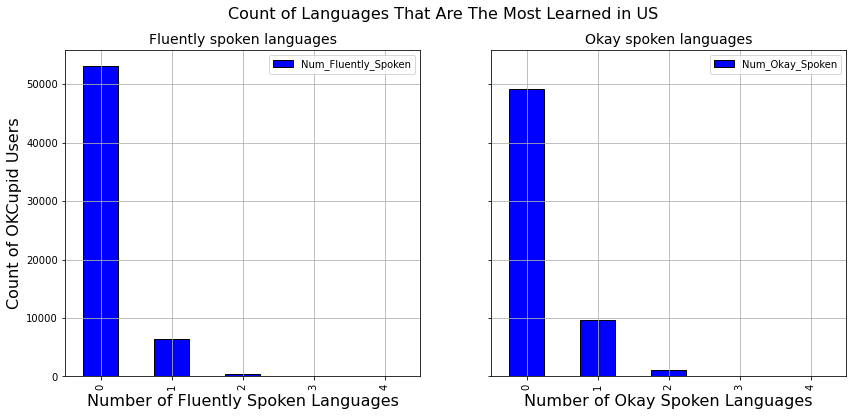

In [255]:
fig, axes = plt.subplots(1,2, figsize=(14,6), sharey = True, squeeze = True)
(ax1, ax2) = axes
plt.suptitle("Count of Languages That Are The Most Learned in US", fontsize = 16)
df.assign(Num_Fluently_Spoken = 1).groupby("Num_Langs_Fluently").count()[["Num_Fluently_Spoken"]].plot.bar(ax=ax1, edgecolor = 'black',  color = 'blue')
df.assign(Num_Okay_Spoken = 1).groupby("Num_Langs_Okay").count()[["Num_Okay_Spoken"]].plot.bar(ax=ax2, edgecolor = 'black',  color = 'blue')
ax1.set_xlabel('Number of Fluently Spoken Languages', fontsize = 16);
ax1.set_ylabel('Count of OKCupid Users', fontsize = 16);
ax1.set_title("Fluently spoken languages", fontsize = 14)
ax1.grid();

ax2.set_xlabel('Number of Okay Spoken Languages', fontsize = 16);
ax2.set_ylabel('Frequency in Dataset', fontsize = 16);
ax2.set_title("Okay spoken languages", fontsize = 14)
ax2.grid();

# Age Distribution and Education Level Counts 

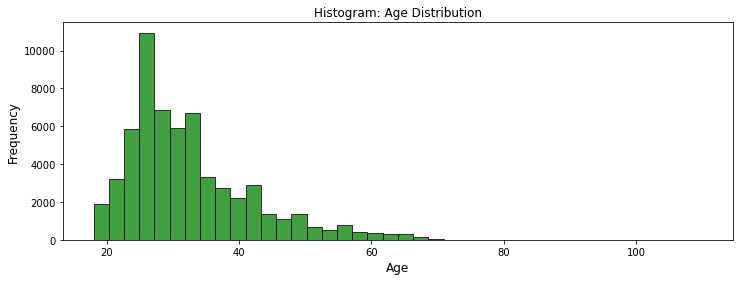

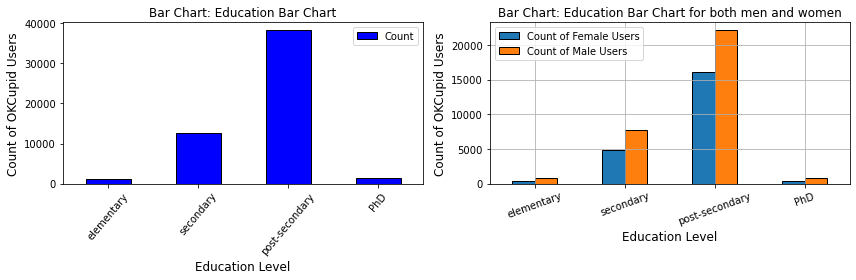

In [256]:
fig, axes = plt.subplots(1,1, figsize=(12,4))
(ax1) = axes

education_labels = ['elementary', 'secondary', 'post-secondary', 'PhD']

df['age'].plot.hist(bins = 40, ax=ax1, edgecolor = 'black', color = 'green', alpha = 0.75);
ax1.set_xlabel('Age', fontsize = 12);
ax1.set_ylabel('Frequency', fontsize = 12);
ax1.set_title('Histogram: Age Distribution', fontsize = 12);

fig, axes = plt.subplots(1,2, figsize=(12,4))
(ax1, ax2) = axes

df.assign(count = 1).groupby("education_code").count()[["count"]].plot.bar(ax=ax1, edgecolor = 'black',  color = 'blue')
ax1.set_xlabel('Education Level', fontsize = 12);
ax1.set_ylabel('Count of OKCupid Users', fontsize = 12);
ax1.set_title('Bar Chart: Education Bar Chart', fontsize = 12);
legend_label_education = ['Count']
ax1.legend(labels= legend_label_education)
ax1.set_xticklabels(education_labels, rotation = 50);

df.assign(count = 1).groupby(["education_code", "sex"]).count()[["count"]].unstack(1).plot.bar(ax = ax2, edgecolor = 'black')
ax2.set_xlabel('Education Level', fontsize = 12);
ax2.set_ylabel('Count of OKCupid Users', fontsize = 12);
ax2.set_title('Bar Chart: Education Bar Chart for both men and women', fontsize = 12);
ax2.set_xticklabels(education_labels, rotation = 20);
legend_label_education_grouped = ['Count of Female Users', 'Count of Male Users']
ax2.legend(labels= legend_label_education_grouped)
ax2.grid();

plt.tight_layout();

# Sexual orientation and Gender

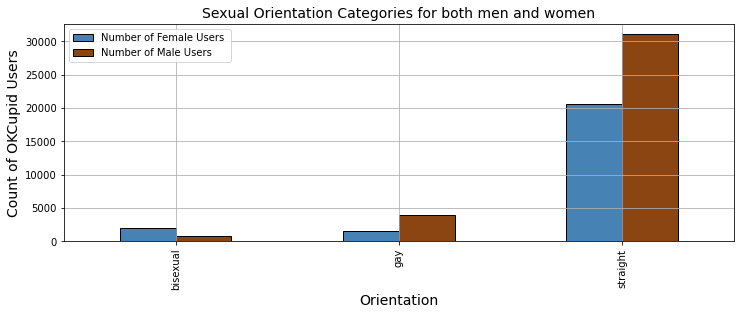

In [307]:
fig, axes = plt.subplots(1,1, figsize=(12,4))
(ax1) = axes
legend_labels = ['Number of Female Users ', 'Number of Male Users']
bar_color = ['steelblue', 'saddlebrown']
df.assign(count = 1).groupby(["orientation", "sex"]).count()[["count"]].unstack(1).plot.bar(ax = ax1, color = bar_color, edgecolor = 'black')
ax1.set_xlabel('Orientation', fontsize = 14);
ax1.set_ylabel('Count of OKCupid Users', fontsize = 14);
ax1.set_title('Sexual Orientation Categories for both men and women', fontsize = 14);
ax1.legend(labels = legend_labels)
ax1.grid();

# Sexual Orientation and Religion

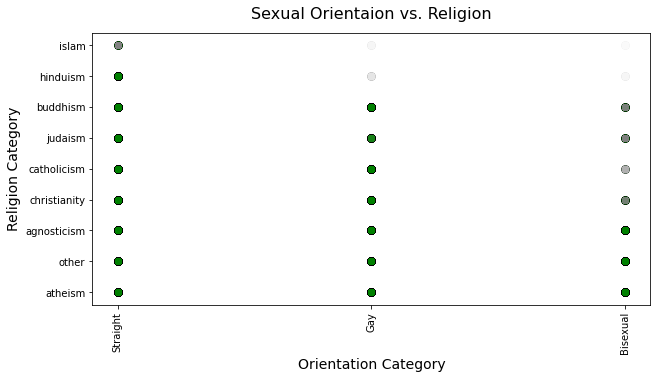

In [417]:
fig, axes = plt.subplots(1,1, figsize=(10,5))
(ax1) = axes

(df[["religion_clear_code", "orientation_code"]].dropna()
 .plot.scatter('orientation_code', 'religion_clear_code', ax = ax1, marker = 'o', s=80, color = 'green', edgecolor = 'black', alpha= 0.002)
);

x_ticks_orientation = [0, 1, 2]
y_ticks_religion = [0, 1, 2, 3, 4, 5, 6, 7, 8]

religion_labels = ['atheism', 'other', 'agnosticism', 'christianity', 'catholicism', 'judaism', 'buddhism', 'hinduism', 'islam']
orientation_labels = ["Straight", "Gay", "Bisexual"]

ax1.set_xticks(x_ticks_orientation)
ax1.set_xticklabels(labels = orientation_labels, rotation = 90)
ax1.set_yticks(y_ticks_religion)
ax1.set_yticklabels(labels = religion_labels)
ax1.set_title('Sexual Orientaion vs. Religion', fontsize=16, y= 1.03)
ax1.set_xlabel('Orientation Category', fontsize=14)
ax1.set_ylabel('Religion Category', fontsize=14);

# Smokes, Drugs, Drinks Use and Gender

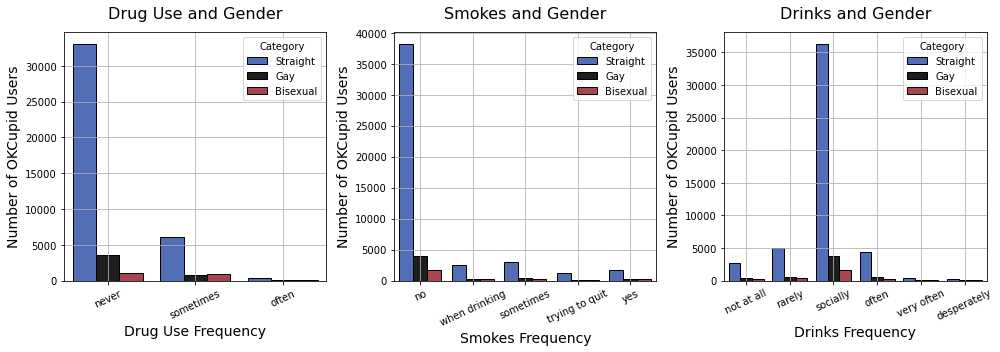

In [315]:
fig, axes = plt.subplots(1,3, figsize=(14,5))
(ax1, ax2, ax3) = axes
axs = [ax1, ax2, ax3] 
    
titles = ['Drug Use and Gender', 
          'Smokes and Gender', 
          'Drinks and Gender'
         ]

xlabels = ['Drug Use Frequency', 'Smokes Frequency', 'Drinks Frequency']
ylabels = 'Number of OKCupid Users'
x_ticks_labels = [["never", "sometimes", "often"], 
                  ['no', 'when drinking', 'sometimes', 'trying to quit', 'yes'],
                  ['not at all', 'rarely', 'socially', 'often', 'very often', 'desperately']
                 ]

columns = ["drugs_code", "smokes_code", "drinks_code"]

for i, ax in enumerate(axs):
    df_a = df.query("orientation_code == 0").assign(count = 1).groupby(columns[i]).count()[["count"]].assign(Category = "Straight")
    df_b = df.query("orientation_code == 1").assign(count = 1).groupby(columns[i]).count()[["count"]].assign(Category = "Gay")
    df_c = df.query("orientation_code == 2").assign(count = 1).groupby(columns[i]).count()[["count"]].assign(Category = "Bisexual")
    df_plot = pd.concat([df_a, df_b, df_c], axis = 0)
    sns.barplot(x = df_plot.index, y = 'count', hue = 'Category', data = df_plot, ax=ax, edgecolor = 'black', palette="icefire");
    ax.set_title(titles[i], fontsize=16, y= 1.03)
    ax.set_xlabel(xlabels[i], fontsize=14)
    ax.set_ylabel(ylabels, fontsize=14)
    ax.set_xticklabels(labels = x_ticks_labels[i], rotation = 25)
    ax.grid()
    plt.tight_layout();

# Ethnicity percentage in the dataset

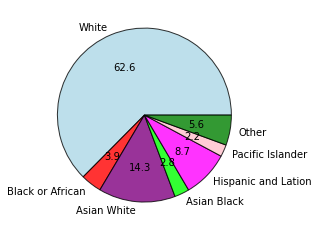

In [44]:
fig, axes = plt.subplots(1,1, figsize=(12,4))
(ax1) = axes
ethnicities = df[["ethnicity_code"]].dropna().assign(count = 1).groupby("ethnicity_code").count().values.flatten()
labels = ['White', 'Black or African', 'Asian White', 'Asian Black', 'Hispanic and Lation', 'Pacific Islander', 'Other']
colors = ['lightblue', 'red', 'purple', 'lime', 'magenta', 'pink', 'green']
ax1.pie(ethnicities, labels = labels, colors=colors, autopct='%.1f', wedgeprops={'edgecolor': 'black', 'alpha': 0.8});

# States and their percentage in the dataset

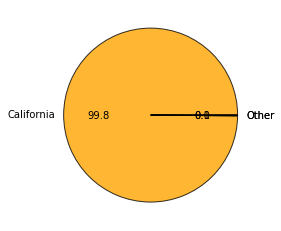

In [422]:
states = df[["State_code"]].assign(count = 1).groupby("State_code").count().values.flatten()
labels_states = ['California', 'Other', 'Other']
colors_states = ['orange', 'cyan', 'yellow']
fig, axes = plt.subplots(1,1, figsize=(12,4))
(ax1) = axes

ax1.pie(states, labels = labels_states, colors=colors_states, autopct='%.1f', wedgeprops={'edgecolor': 'black', 'alpha': 0.8});

# Income distribution in state California

Majority is OKCupid users come from State California and therefore the income distribution is plotted only based on data point of all californian people in the data set. 

The value in the "income" column with the highest occurence is -1. Those entries have been dropped before histogram plot. 

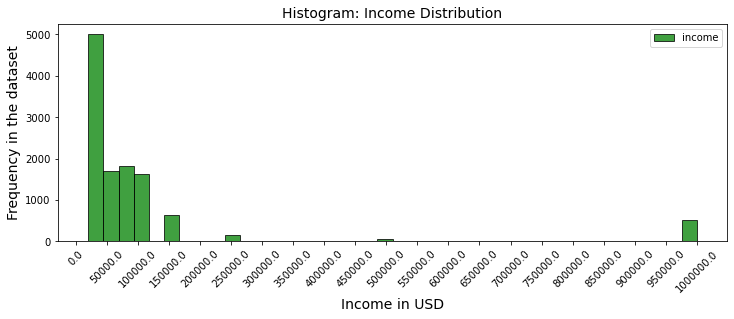

In [181]:
fig, axes = plt.subplots(1,1, figsize=(12,4))
(ax1) = axes
x_ticks_income = np.linspace(0,1000000,21)
(df.drop(df.query("State_code != 0" and "income < 0").index, axis = 0)[["income"]]
.plot.hist(bins = 40, ax=ax1, edgecolor = 'black', color = 'green', alpha = 0.75)
)

ax1.set_xlabel('Income in USD', fontsize = 14);
ax1.set_ylabel('Frequency in the dataset', fontsize = 14);
ax1.set_title('Histogram: Income Distribution', fontsize = 14)
ax1.set_xticks(x_ticks_income)
ax1.set_xticklabels(x_ticks_income, rotation = 45);

# Job Categories in state California

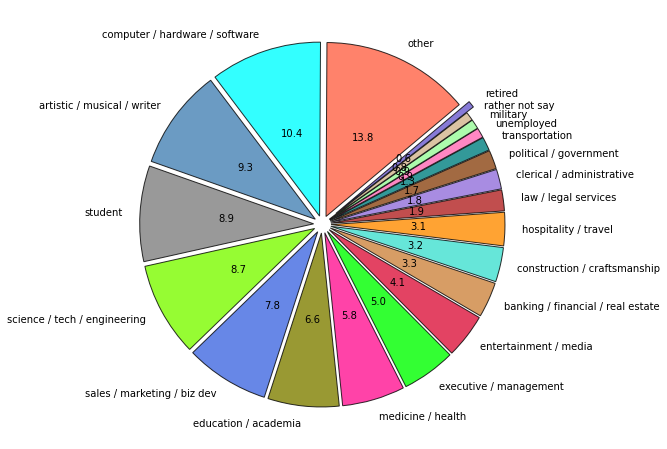

In [47]:
job_pie_df = (df.drop(df.query("State_code != 0" and "income < 0").index, axis = 0).assign(count = 1).groupby("job").count()[["count"]]
    .sort_values("count", ascending = False)
                )
data_job_pie = job_pie_df.values.flatten()
labels_job_pie = np.array(list(job_pie_df.index))
color_job_pie = ['tomato', 'aqua', 'steelblue', 'gray', 'lawngreen', 'royalblue', 'olive', 
                 'deeppink', 'lime', 'crimson', 'peru', 'turquoise', 'darkorange', 'firebrick',
                'mediumpurple', 'saddlebrown', 'teal', 'hotpink', 'palegreen', 'tan', 'slateblue'
                ]
fig, axes = plt.subplots(1,1, figsize=(8,8))
(ax1) = axes

ax1.pie(data_job_pie, labels = labels_job_pie, colors=color_job_pie, 
        explode=np.concatenate([np.repeat(0.05, len(data_job_pie)-1), np.array([0.1])]),
        autopct='%.1f', 
        pctdistance=0.5, 
        wedgeprops={'edgecolor': 'black', 'alpha': 0.8}, 
        textprops={'fontsize':10.0},
        startangle=40
        );

# Offspring and Gender

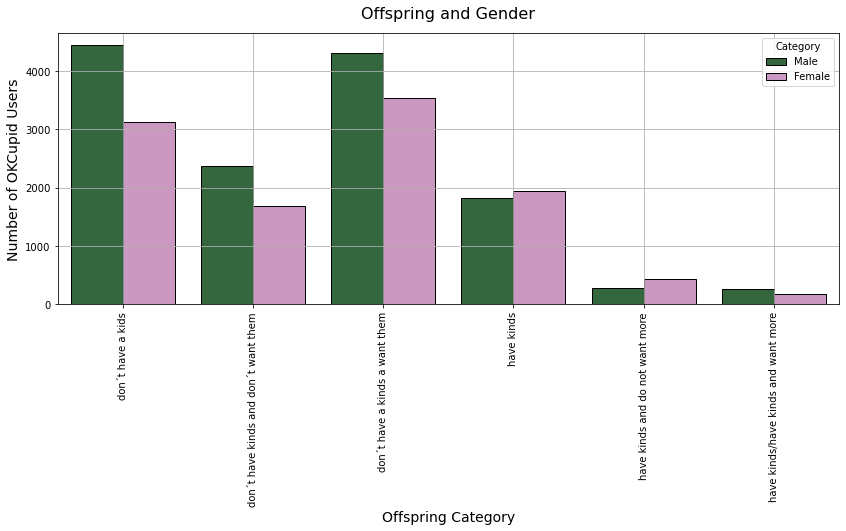

In [285]:
fig, axes = plt.subplots(1,1, figsize=(14,5))
(ax1) = axes

    
title = 'Offspring and Gender'

xlabel = 'Offspring Category'
ylabel = 'Number of OKCupid Users'
x_ticks_labels = ['don´t have a kids', 'don´t have kinds and don´t want them', 'don´t have a kinds a want them',
                    'have kinds', 'have kinds and do not want more', 'have kinds/have kinds and want more']


df_a = df.query("sex_code == 0").assign(count = 1).groupby("offspring_code").count()[["count"]].assign(Category = "Male")
df_b = df.query("sex_code == 1").assign(count = 1).groupby("offspring_code").count()[["count"]].assign(Category = "Female")
df_plot = pd.concat([df_a, df_b], axis = 0)
sns.barplot(x = df_plot.index, y = 'count', hue = 'Category', data = df_plot, ax=ax1, edgecolor = 'black', palette="cubehelix");
ax1.set_title(title, fontsize=16, y= 1.03)
ax1.set_xlabel(xlabel, fontsize=14)
ax1.set_ylabel(ylabel, fontsize=14)
ax1.set_xticklabels(labels = x_ticks_labels, rotation = 90)
ax1.grid()

# Offspring, Sexual orientation and Religion

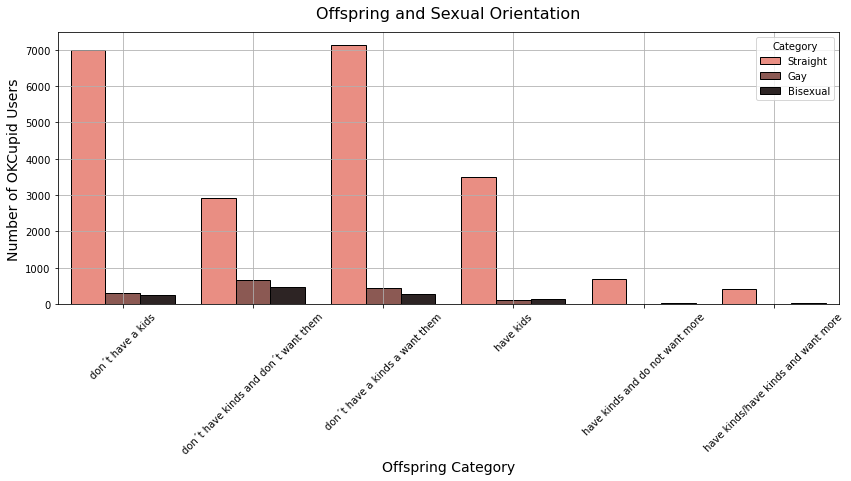

In [312]:
fig, axes = plt.subplots(1,1, figsize=(14,5))
(ax1) = axes

    
title = 'Offspring and Sexual Orientation'

xlabel = 'Offspring Category'
ylabel = 'Number of OKCupid Users'
x_ticks_labels = ['don´t have a kids', 'don´t have kinds and don´t want them', 'don´t have a kinds a want them',
                    'have kids', 'have kinds and do not want more', 'have kinds/have kinds and want more']


df_a = df.query("orientation_code == 0").assign(count = 1).groupby("offspring_code").count()[["count"]].assign(Category = "Straight")
df_b = df.query("orientation_code == 1").assign(count = 1).groupby("offspring_code").count()[["count"]].assign(Category = "Gay")
df_c = df.query("orientation_code == 2").assign(count = 1).groupby("offspring_code").count()[["count"]].assign(Category = "Bisexual")
df_plot = pd.concat([df_a, df_b, df_c], axis = 0)
sns.barplot(x = df_plot.index, y = 'count', hue = 'Category', data = df_plot, ax=ax1, edgecolor = 'black', palette="dark:salmon_r");
ax1.set_title(title, fontsize=16, y= 1.03)
ax1.set_xlabel(xlabel, fontsize=14)
ax1.set_ylabel(ylabel, fontsize=14)
ax1.set_xticklabels(labels = x_ticks_labels, rotation = 45)
ax1.grid()

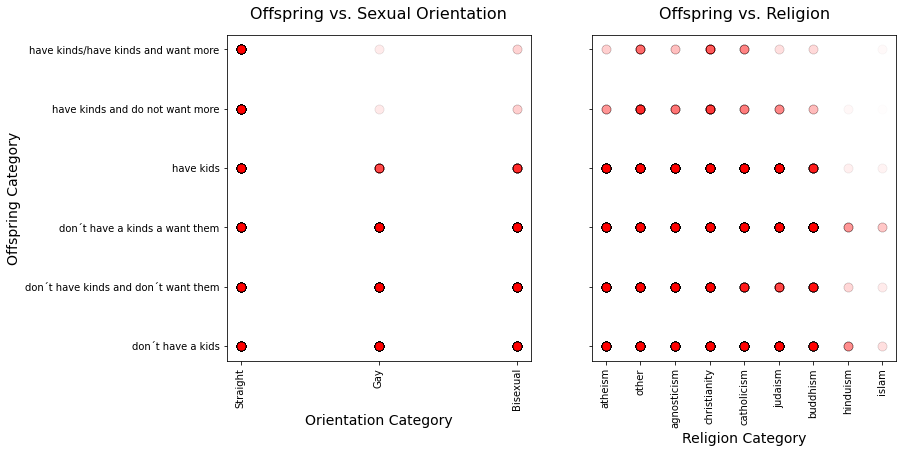

In [411]:
fig, axes = plt.subplots(1,2, figsize = (12,6), sharey=True)
(ax1, ax2) = axes
(df[["orientation_code", "offspring_code"]].dropna()
 .plot.scatter('orientation_code', 'offspring_code', ax = ax1, marker = 'o', s=80, color = 'red', edgecolor = 'black', alpha= 0.009)
);
x_ticks_orientation = [0, 1, 2]
y_ticks_offspring = [0, 1, 2, 3, 4, 5]

offspring_labels = ['don´t have a kids', 'don´t have kinds and don´t want them', 'don´t have a kinds a want them',
                    'have kids', 'have kinds and do not want more', 'have kinds/have kinds and want more']

orientation_labels = ["Straight", "Gay", "Bisexual"]

ax1.set_xticks(x_ticks_orientation)
ax1.set_xticklabels(labels = orientation_labels, rotation = 90)
ax1.set_yticks(y_ticks_offspring)
ax1.set_yticklabels(labels = offspring_labels)
ax1.set_title('Offspring vs. Sexual Orientation', fontsize=16, y= 1.03)
ax1.set_xlabel('Orientation Category', fontsize=14)
ax1.set_ylabel('Offspring Category', fontsize=14);


(df[["religion_clear_code", "offspring_code"]].dropna()
 .plot.scatter('religion_clear_code', 'offspring_code', ax = ax2, marker = 'o', s=80, color = 'red', edgecolor = 'black', alpha= 0.009)
);
x_ticks_religion = [0, 1, 2, 3, 4, 5, 6, 7, 8]
religion_labels = ['atheism', 'other', 'agnosticism', 'christianity', 'catholicism', 'judaism', 'buddhism', 'hinduism', 'islam']
ax2.set_xticks(x_ticks_religion)
ax2.set_xticklabels(labels = religion_labels, rotation = 90)
ax2.set_yticks(y_ticks_offspring)
ax2.set_yticklabels(labels = offspring_labels)
ax2.set_title('Offspring vs. Religion', fontsize=16, y= 1.03)
ax2.set_xlabel('Religion Category', fontsize=14)
ax2.set_ylabel('Offspring Category', fontsize=14);

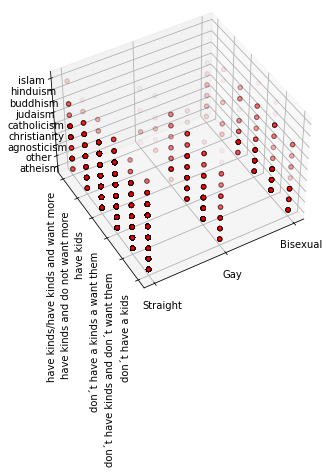

In [397]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(6,4))
plt.clf()
elev = 43.5
azim = -120
plot_3D_df = df[["orientation_code", "offspring_code", "religion_clear_code"]].dropna()
ax = Axes3D(fig, elev= elev, azim=azim)
ax.scatter(df[["orientation_code"]], df[["offspring_code"]], df[["religion_clear_code"]], color = 'red', edgecolor = 'black', alpha = 0.05);

x_ticks_orientation = [0, 1, 2]
y_ticks_offspring = [0, 1, 2, 3, 4, 5]
z_ticks_religion = [0, 1, 2, 3, 4, 5, 6, 7, 8]
offspring_labels = ['don´t have a kids', 'don´t have kinds and don´t want them', 'don´t have a kinds a want them',
                    'have kids', 'have kinds and do not want more', 'have kinds/have kinds and want more']
orientation_labels = ["Straight", "Gay", "Bisexual"]
religion_labels = ['atheism', 'other', 'agnosticism', 'christianity', 'catholicism', 'judaism', 'buddhism', 'hinduism', 'islam']

ax.set_xticks(x_ticks_orientation);
ax.set_xticklabels(labels = orientation_labels, rotation = 0);
ax.set_yticks(y_ticks_offspring);
ax.set_yticklabels(labels = offspring_labels, rotation=90);
ax.set_zticks(z_ticks_religion);
ax.set_zticklabels(labels = religion_labels, rotation=0);

# K-Nearest Neighbors algoritm 

## Normalization
Data has to be normalized in order to make every datapoint have the same scale so each feature is equally important. 
1. min-max normaliztion is the most common way to normalize data -> data are transformed into a decimal between 0 and 1.
    This method does not handle outliers, but all features will have the exact same scale. 


2. Z-Score normalization is a strategy of normalizing data that avoids outlier issue, but does not produced normalized data with the exact same scale. 

## Strategies to analyze predictive power of classification algorithm

A. Accuracy - measures how many classifications the algorithm got correct out of every classification it made.
Accuracy = True Positives + True Negatives /  True Positives + True Negatives +  False Positives + False Negatives

B. Recall - measures the percentage of relevant items the algorithm was able to successfully find. 

Recall = True Positive / True Positive + False Negative


C. Precision - measures the percentage of items the algorithm found that were actually relevant. 

Precision = True Positive / True Positive + False Positive


D. F1 Score - combination of accuracy, recall and precision. 

F1 Score = 2 * Precision * Recall / (Precision + Recall)



# Can we predict zodiac sign ?

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler


In [49]:
cols_for_KN = ["drugs_code", "drinks_code", "smokes_code", "sign_clear", "essay_length_clean", "I_me_Freq", "essay_length_wo_spaces", "num_words"]
df_KN = df.dropna(subset = cols_for_KN)[cols_for_KN]
df_KN = df_KN.drop(df_KN.query("num_words == 0").index, axis = 0)
df_KN["avg_word_len"] = round(df_KN["essay_length_wo_spaces"] / df_KN["num_words"], 1)

In [50]:
df_KN.isna().sum()

drugs_code                0
drinks_code               0
smokes_code               0
sign_clear                0
essay_length_clean        0
I_me_Freq                 0
essay_length_wo_spaces    0
num_words                 0
avg_word_len              0
dtype: int64

In [51]:
features = df_KN[["drugs_code", "drinks_code", "smokes_code", "essay_length_clean", "avg_word_len"]]
X = features.values
labels = df_KN[["sign_clear"]].values.reshape(-1,)

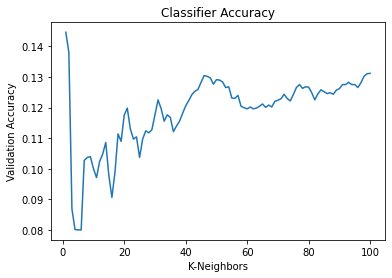

In [50]:
training_data, validation_data, training_labels, validation_labels = train_test_split(X, labels, test_size = 0.2, random_state = 6)
scaler = MinMaxScaler()
training_data_scaled = scaler.fit_transform(training_data)
validation_data_scaled = scaler.fit_transform(validation_data)

neighbors_dict = {}
for k in range(1,101):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(training_data_scaled, training_labels)
    r = classifier.score(validation_data_scaled, validation_labels)
    neighbors_dict[k] = r

x = list(neighbors_dict.keys())
y = list(neighbors_dict.values())

plt.plot(x,y)
plt.xlabel("K-Neighbors")
plt.ylabel("Validation Accuracy")
plt.title("Classifier Accuracy")
plt.show();



# K-Nearest Neighbor Classifier and Regressor

K-Nearest Neighbor algorithm can be used for regression and classification. 
When k is small, overfitting occurs and the accuracy is relatively low. 
On the other hand, when k gets too large, underfitting occurs and accuracy starts to


Classifier returns label as a single guess, regressor is returning a number. 

By using weighted average, data points that are extremely similar to the input point will have more of a say in the final results of regression. 


# Can we predict income with age, education, job, sex and city?

In [94]:
from sklearn.neighbors import KNeighborsRegressor

cols_for_KNR = ['income_code', 'income', 'age', 'education_code', 'job_code', 
                'sex_code', 'Num_Langs_Fluently', 'Num_Langs_Okay', 
                'num_words', 'essay_length_clean', 'essay_length_wo_spaces',
                'City_code', 'drugs_code', 'drinks_code', 'smokes_code',
                'orientation_code', 'ethnicity_code'
                ]

df_KNR = df.query("State_code == 0").dropna(subset = cols_for_KNR)[cols_for_KNR]
df_KNR = df_KNR.drop(df_KNR.query("income < 0").index, axis = 0)
df_KNR = df_KNR.drop(df_KNR.query("num_words == 0").index, axis = 0)
df_KNR["avg_word_len"] = round(df_KNR["essay_length_wo_spaces"] / df_KNR["num_words"], 1)

In [95]:
df_KNR["income_code"].value_counts()

1    4253
2    2843
3     850
Name: income_code, dtype: int64

In [96]:
features_KNR = df_KNR[['age', 'education_code', 'job_code', 'sex_code', 'City_code']]

In [97]:
X_KNR = features_KNR.values
Y_KNR = df_KNR[["income_code"]].values.reshape(-1,)

In [98]:
train_data, test_data, train_labels, test_labels = train_test_split(X_KNR, Y_KNR, test_size = 0.2, random_state = 6)

In [99]:
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.fit_transform(test_data)

In [100]:
df_KNR.describe()

,income_code,income,age,education_code,job_code,sex_code,Num_Langs_Fluently,Num_Langs_Okay,num_words,essay_length_clean,essay_length_wo_spaces,City_code,drugs_code,drinks_code,smokes_code,orientation_code,ethnicity_code,avg_word_len
count,7946.000000,7946.000000,7946.000000,7946.000000,7946.000000,7946.000000,7946.000000,7946.000000,7946.000000,7946.000000,7946.000000,7946.000000,7946.000000,7946.000000,7946.000000,7946.000000,7946.000000,7946.000000
mean,1.571734,96503.901334,32.640700,2.634533,8.782910,0.283916,0.126227,0.211679,391.404984,2210.602441,1820.197458,1.999371,0.259502,1.863327,0.571357,0.181475,1.228291,4.561301
std,0.677389,187150.699477,10.106215,0.577824,5.949425,0.450925,0.368419,0.472525,339.058672,2127.263417,1796.780870,2.195854,0.476365,0.805079,1.152885,0.507255,1.898556,0.731574
min,1.000000,20000.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000
25%,1.000000,20000.000000,25.000000,2.000000,4.000000,0.000000,0.000000,0.000000,176.000000,955.250000,780.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,4.200000
50%,1.000000,50000.000000,30.000000,3.000000,8.000000,0.000000,0.000000,0.000000,318.000000,1733.000000,1411.500000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,4.400000
75%,2.000000,80000.000000,38.000000,3.000000,12.000000,1.000000,0.000000,0.000000,514.000000,2851.750000,2334.750000,5.000000,0.000000,2.000000,0.000000,0.000000,2.000000,4.700000
max,3.000000,1000000.000000,69.000000,4.000000,20.000000,1.000000,4.000000,4.000000,11262.000000,84149.000000,72888.000000,5.000000,2.000000,5.000000,4.000000,2.000000,6.000000,29.100000


N-Neighbors = 1, Score: 0.5880503144654088
N-Neighbors = 2, Score: 0.660377358490566
N-Neighbors = 3, Score: 0.6509433962264151
N-Neighbors = 4, Score: 0.6792452830188679
N-Neighbors = 5, Score: 0.6723270440251572
N-Neighbors = 6, Score: 0.6880503144654088
N-Neighbors = 7, Score: 0.6779874213836478
N-Neighbors = 8, Score: 0.6867924528301886
N-Neighbors = 9, Score: 0.6830188679245283
N-Neighbors = 10, Score: 0.6830188679245283
N-Neighbors = 11, Score: 0.6855345911949685
N-Neighbors = 12, Score: 0.6880503144654088
N-Neighbors = 13, Score: 0.6874213836477987
N-Neighbors = 14, Score: 0.6842767295597484
N-Neighbors = 15, Score: 0.6911949685534591
N-Neighbors = 16, Score: 0.690566037735849
N-Neighbors = 17, Score: 0.6842767295597484
N-Neighbors = 18, Score: 0.6849056603773584
N-Neighbors = 19, Score: 0.690566037735849
N-Neighbors = 20, Score: 0.6867924528301886
N-Neighbors = 21, Score: 0.6924528301886792
N-Neighbors = 22, Score: 0.6937106918238993
N-Neighbors = 23, Score: 0.6949685534591195


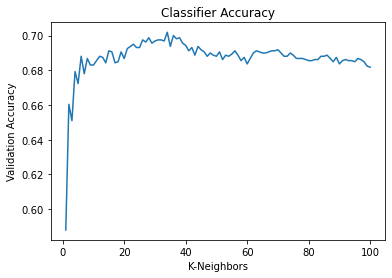

In [102]:
neighbors_dict_KNR = {}
for k in range(1,101):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data_scaled, train_labels)
    r = classifier.score(test_data_scaled, test_labels)
    neighbors_dict_KNR[k] = r
    print('N-Neighbors = {}, Score: {}'.format(k, r))
    
x = list(neighbors_dict_KNR.keys())
y = list(neighbors_dict_KNR.values())

plt.plot(x,y)
plt.xlabel("K-Neighbors")
plt.ylabel("Validation Accuracy")
plt.title("Classifier Accuracy")
plt.show();

K-Nearest Neighbor is able to classify the income category with 70 % accuracy, for N_Neighbors = 35.

It can be used for K-Neighbor Regression in the next step to predict the income value. 

In [103]:
# Features for K-Neighbors Regressor
norm_features = scaler.fit_transform(features_KNR.values)

In [104]:
# Labels for K-Neighbors Regressor
labels_KNR = df_KNR[["income"]].values.reshape(-1,)

In [105]:
regressor = KNeighborsRegressor(n_neighbors = 35, weights = "distance")
regressor.fit(norm_features, labels_KNR)

KNeighborsRegressor(n_neighbors=35, weights='distance')

In [106]:
norm_features[100]

array([0.07843137, 0.66666667, 0.3       , 0.        , 0.        ])

In [107]:
labels_KNR[100]

60000

In [108]:
regressor.predict([[0.07843137, 0.66666667, 0.3       , 0.        , 0.        ]])

array([60000.17806389])

## Prediction

Age = 46

education = PhD

job = Computer / software

Sex = Man

City = San Francisco

In [109]:
guess_1 = [0.549, 1.0, 0.2, 0.0, 0.0]

Age = 27

education = Elementary

job = student

Sex = Women

City = Berkeley

In [110]:
guess_2 = [0.17647058823529413, 0.0, 0.1, 1.0, 0.4]

Age = 35

education = Post secondary

job = law services - 15

Sex = Man

City = Other in California

In [111]:
guess_3 = [0.333, 0.666, 0.75, 0.0, 1.0]

In [112]:
regressor.predict([guess_1, guess_2, guess_3])

array([208086.07253563, 113331.80354362, 122397.60523662])

In [172]:
def normalize_input(df, input_list):
    norm_list = []
    for i in range(len(input_list)):
        item = df.columns[i]
        minimum = df[[item]].min()
        maximum = df[[item]].max()
        norm_value = float((input_list[i] - minimum) / (maximum - minimum))
        norm_list.append(norm_value)
    return norm_list   
age = int(input("Enter Age (18-69):"))

education_id = int(input("""Enter Education ID: 
                        elementary: 1 
                        secondary: 2 
                        post-secondary: 3 
                        PhD: 4"""))

job_id = int(input("""Enter Job ID:    
                        transportation : 0 
                        hospitality / travel : 1 
                        student : 2
                        artistic / musical / writer : 3 
                        computer / hardware / software : 4 
                        banking / financial / real estate : 5 
                        entertainment / media : 6
                        sales / marketing / biz dev : 7 
                        medicine / health : 8 
                        science / tech / engineering : 9 
                        executive / management : 10  
                        education / academia : 11 
                        clerical / administrative : 12 
                        construction / craftsmanship : 13  
                        political / government : 14 
                        law / legal services : 15  
                        military  : 16 
                        unemployed : 17
                        retired : 18
                        rather not say : 19
                        other :20..."""))

sex = int(input("""Enter Sex: 
                         Male : 0
                        Female : 1  
                        """))

city = int(input("""Enter City ID: 
                        san francisco : 0
                        oakland : 1
                        berkeley : 2
                        san mateo : 3
                        palo alto : 4
                        other : 5"""))
inp_list = [age, education_id,  job_id, sex, city]

norm_list = normalize_input(features_KNR, inp_list)

print('Predicted income {} :'.format(round(regressor.predict([norm_list])[0],2)))

Enter Age (18-69):33
Enter Education ID: 
                        elementary: 1 
                        secondary: 2 
                        post-secondary: 3 
                        PhD: 43
Enter Job ID:    
                        transportation : 0 
                        hospitality / travel : 1 
                        student : 2
                        artistic / musical / writer : 3 
                        computer / hardware / software : 4 
                        banking / financial / real estate : 5 
                        entertainment / media : 6
                        sales / marketing / biz dev : 7 
                        medicine / health : 8 
                        science / tech / engineering : 9 
                        executive / management : 10  
                        education / academia : 11 
                        clerical / administrative : 12 
                        construction / craftsmanship : 13  
                        political / governmen

# Can we predict vegetarianism based with body type, smokes, drugs and relationship to pets?

## Random Decision Forest

Random forests are used to avoid overfitting. By aggregating the classification of multiple trees, having overfitted trees in a random forest is less impactful. 

Every decision tree in a random forest is created by using a different subset of data points from the training set. Those data points are chosen at random with replacement, which means a single data point can be chosen more than once. This process is known as bagging. 

In [508]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,orientation_code,education_code,ethnicity_code,job_code,sex_code,State_code,City_code,body_type_code,pets_code,religion_clear_code
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,0,2.0,2.0,0.0,0,0,0,0.0,0.0,2.0
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,0,1.0,0.0,1.0,0,0,1,6.0,0.0,2.0
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,0,3.0,NaN,NaN,0,0,0,1.0,2.0,NaN
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,0,2.0,0.0,2.0,0,0,2,1.0,2.0,NaN
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,0,3.0,3.0,3.0,0,0,0,4.0,0.0,NaN


In [46]:
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample
from sklearn.metrics import roc_curve

In [126]:
RFC_df = df[["diet_code", "smokes_code", "drugs_code", "body_type_code", "pets_code", "orientation_code",
            "religion_clear_code", "education_code", "sex_code", "job_code", "City_code", "ethnicity_code"]].dropna()
veg_codes = [6, 7, 8, 9 ,10, 11]
RFC_df["veg_status"] = RFC_df.apply(lambda row: 1 if row["diet_code"] in veg_codes else 0, axis = 1)

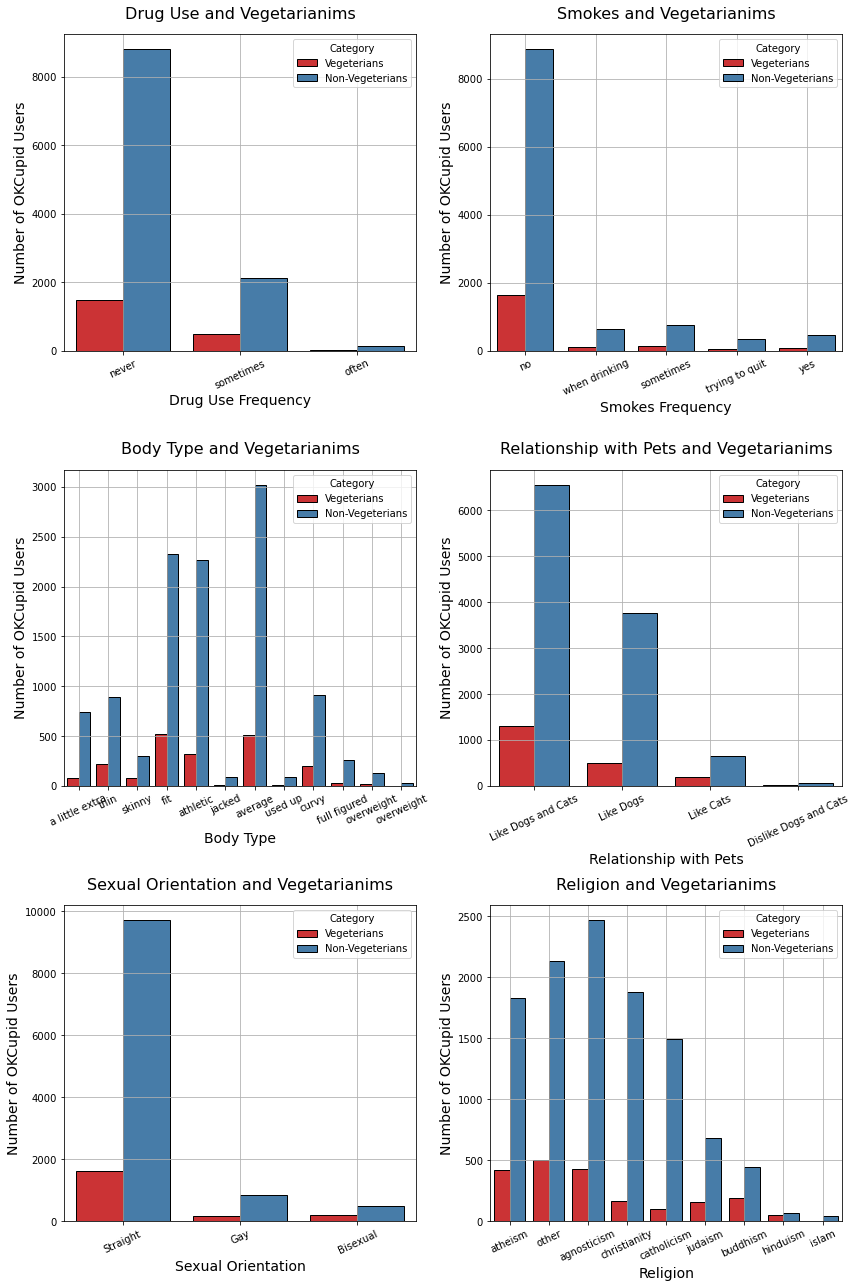

In [135]:
fig, axes = plt.subplots(3,2, figsize=(12,18))
([ax1, ax2], [ax3, ax4], [ax5, ax6]) = axes
axs = [ax1, ax2, ax3, ax4, ax5, ax6]
    
titles = ['Drug Use and Vegetarianims', 
          'Smokes and Vegetarianims', 
          'Body Type and Vegetarianims', 
          'Relationship with Pets and Vegetarianims', 
          'Sexual Orientation and Vegetarianims',
          'Religion and Vegetarianims']

xlabels = ['Drug Use Frequency', 'Smokes Frequency', 'Body Type', 'Relationship with Pets', 'Sexual Orientation', 'Religion']
ylabels = 'Number of OKCupid Users'
x_ticks_labels = [["never", "sometimes", "often"], 
                  ['no', 'when drinking', 'sometimes', 'trying to quit', 'yes'],
                  ['a little extra', 'thin', 'skinny', 'fit', 'athletic', 'jacked', 'average', 'used up', 'curvy', 'full figured','overweight', 'overweight'],
                  ['Like Dogs and Cats', 'Like Dogs', 'Like Cats', 'Dislike Dogs and Cats'],
                  ['Straight', 'Gay', 'Bisexual'],
                  ['atheism', 'other', 'agnosticism', 'christianity', 'catholicism', 'judaism', 'buddhism', 'hinduism', 'islam']
                 ]

columns = ["drugs_code", "smokes_code", "body_type_code", "pets_code", "orientation_code", "religion_clear_code"]

for i, ax in enumerate(axs):
    df_a = RFC_df.query("veg_status == 1").assign(count = 1).groupby(columns[i]).count()[["count"]].assign(Category = "Vegeterians")
    df_b = RFC_df.query("veg_status == 0").assign(count = 1).groupby(columns[i]).count()[["count"]].assign(Category = "Non-Vegeterians")
    df_plot = pd.concat([df_a, df_b], axis = 0)
    sns.barplot(x = df_plot.index, y = 'count', hue = 'Category', data = df_plot, ax=ax, edgecolor = 'black', palette="Set1");
    ax.set_title(titles[i], fontsize=16, y= 1.03)
    ax.set_xlabel(xlabels[i], fontsize=14)
    ax.set_ylabel(ylabels, fontsize=14)
    ax.set_xticklabels(labels = x_ticks_labels[i], rotation = 25)
    ax.grid()
    plt.tight_layout();


### Imbalance Data Handling

Data set is obviously imbalanced. 
Classifier usually predicts mostly the same value which is resulting in very high accuracy of classification. 
The traditional approach of classification and model accuracy calculation is therefore not useful in the case of the imbalanced dataset.

The other metrics such as precision is the measure of how accurate the classifier’s prediction of a specific class and recall is the measure of the classifier’s ability to identify a class.

For an imbalanced class dataset F1 score is a more appropriate metric. 

Resampling: 
This technique is used to upsample or downsample the minority or majority class. When we are using an imbalanced dataset, we can oversample the minority class using replacement. This technique is called oversampling. Similarly, we can randomly delete rows from the majority class to match them with the minority class which is called undersampling.

### Data Resampling

Data set has been resampled and minority part has been upscaled to match majority class.

In [754]:
#create two different dataframe of majority and minority class 
df_majority = RFC_df[(RFC_df['veg_status']==0)] 
df_minority = RFC_df[(RFC_df['veg_status']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 11049, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

Number of values after upsampling are as follows:

In [781]:
df_upsampled.veg_status.value_counts()

0    11049
1    11049
Name: veg_status, dtype: int64

In [802]:
X_RFC = df_upsampled[["smokes_code", 
                      "drugs_code", 
                      "body_type_code", 
                      "orientation_code", 
                      "religion_clear_code", 
                      "sex_code", 
                      "City_code", 
                      "ethnicity_code"
                     ]]
Y_RFC = df_upsampled[["veg_status"]].values.reshape(-1,)

In [783]:
X_train, X_test, Y_train, Y_test = train_test_split(X_RFC, Y_RFC, test_size = 0.2, random_state = 1)

In [784]:
forest = RandomForestClassifier(n_estimators = 100, random_state = 42)
forest.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [785]:
y_predicted = forest.predict(X_test)

Decission Tree Forest classifier has been train and following score parameters have been achieved:

In [786]:
print('Recall score: {}'.format(round(recall_score(Y_test, y_predicted), 4)))
print('Accuracy score: {}'.format(round(accuracy_score(Y_test, y_predicted), 4)))
print('Precision score: {}'.format(round(precision_score(Y_test, y_predicted), 4)))
print('F1 score: {}'.format(round(f1_score(Y_test, y_predicted), 4)))

Recall score: 0.838
Accuracy score: 0.786
Precision score: 0.7655
F1 score: 0.8001


In [787]:
ConfusionMatrix = confusion_matrix(Y_test, y_predicted)

Number of true negatives, true positives, false negatives and false positives are as follows:

In [788]:
print('True Negative: {}'.format(ConfusionMatrix[0][0]))
print('True Positive: {}'.format(ConfusionMatrix[1][1]))
print('False Negative: {}'.format(ConfusionMatrix[1][0]))
print('False Positive: {}'.format(ConfusionMatrix[0][1]))

True Negative: 1581
True Positive: 1893
False Negative: 366
False Positive: 580


In [790]:
score_test = forest.score(X_test, Y_test)
print('Test score: {}'.format(score_test))

Test score: 0.785972850678733


In [789]:
score_train = forest.score(X_train, Y_train)
print('Train score: {}'.format(score_train))

Train score: 0.8252064713202851


Upscaling applied on the data set before splitting to training and validation set leads to repeating the labels and the algorithm has a perfect Recall Score of 84 %. It is too optimistic results and is supposed to be totally wrong. Due to data leakage from train set to test set we have exactly same data in the testing and validation set.

### Resampling applied on the training set exclusively

In [318]:
RFC_df = df[["diet_code", "smokes_code", "drugs_code", "body_type_code", "pets_code", "orientation_code",
            "religion_clear_code", "education_code", "sex_code", "job_code", "City_code", "ethnicity_code"]].dropna()
veg_codes = [6, 7, 8, 9 ,10, 11]
RFC_df["veg_status"] = RFC_df.apply(lambda row: 1 if row["diet_code"] in veg_codes else 0, axis = 1)

In [350]:
X_RFC = RFC_df[["smokes_code", 
                "drugs_code", 
                "body_type_code", 
                "orientation_code"
                #"religion_clear_code" 
                #"sex_code", 
                #"City_code", 
                #"ethnicity_code"
               ]]
Y_RFC = RFC_df[["veg_status"]]

In [351]:
X_train, X_test, Y_train, Y_test = train_test_split(X_RFC, Y_RFC, test_size = 0.2, random_state = 1)

In [352]:
train_set = X_train.join(Y_train)

In [353]:
df_majority = train_set[(train_set['veg_status']==0)] 
df_minority = train_set[(train_set['veg_status']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 8824, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [354]:
df_upsampled.veg_status.value_counts()

0    8824
1    8824
Name: veg_status, dtype: int64

In [356]:
X_train_resampled = df_upsampled[["smokes_code", 
                      "drugs_code", 
                      "body_type_code", 
                      "orientation_code"
                      #"religion_clear_code"  
                      #"sex_code", 
                      #"City_code", 
                      #"ethnicity_code"
                     ]]
Y_train_resampled = df_upsampled[["veg_status"]].values.reshape(-1,)

In [357]:
forest = RandomForestClassifier(n_estimators = 100, random_state = 42)
forest.fit(X_train_resampled, Y_train_resampled)

RandomForestClassifier(random_state=42)

In [358]:
y_predicted = forest.predict(X_test)

In [359]:
print('Recall score: {}'.format(round(recall_score(Y_test, y_predicted), 4)))
print('Accuracy score: {}'.format(round(accuracy_score(Y_test, y_predicted), 4)))
print('Precision score: {}'.format(round(precision_score(Y_test, y_predicted), 4)))
print('F1 score: {}'.format(round(f1_score(Y_test, y_predicted), 4)))

Recall score: 0.5387
Accuracy score: 0.5656
Precision score: 0.1794
F1 score: 0.2692


Recall score get worse to 54 % . Classifier score is very poor!

In [173]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status',
       'Num_Langs_Fluently', 'Num_Langs_Okay', 'State', 'City',
       'religion_clear', 'sign_clear', 'essays_combined', 'I_me_Freq',
       'num_words', 'essay_length_clean', 'essay_length_wo_spaces',
       'income_code', 'diet_code', 'drugs_code', 'drinks_code', 'smokes_code',
       'orientation_code', 'education_code', 'ethnicity_code', 'job_code',
       'sex_code', 'State_code', 'City_code', 'body_type_code', 'pets_code',
       'religion_clear_code'],
      dtype='object')

In [316]:
df.status.value_counts()

single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: status, dtype: int64

In [317]:
df.religion.value_counts()

agnosticism                                   2724
other                                         2691
agnosticism but not too serious about it      2636
agnosticism and laughing about it             2496
catholicism but not too serious about it      2318
atheism                                       2175
other and laughing about it                   2119
atheism and laughing about it                 2074
christianity                                  1957
christianity but not too serious about it     1952
other but not too serious about it            1554
judaism but not too serious about it          1517
atheism but not too serious about it          1318
catholicism                                   1064
christianity and somewhat serious about it     927
atheism and somewhat serious about it          848
other and somewhat serious about it            846
catholicism and laughing about it              726
judaism and laughing about it                  681
buddhism but not too serious ab

# Can we predict sexual orientation based on offspring, religion and drugs?

In [71]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

In [72]:
np.logspace(-3, 3, 7)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [73]:
np.logspace(-3, 2, 6)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [173]:
scaler = MinMaxScaler()
classifier = SVC(kernel = 'rbf')

In [144]:
df_SVC = df[["orientation_code", "offspring_code", "religion_clear_code", "drugs_code"]].dropna()

In [145]:
df_SVC[["orientation_code"]].value_counts()

orientation_code
0                   12859
1                     986
2                     764
dtype: int64

In [151]:
df_SVC_straight = df_SVC[df_SVC['orientation_code']==0].sample(764)
df_SVC_gay = df_SVC[df_SVC['orientation_code']==1].sample(764)
df_SVC_bisexual = df_SVC[df_SVC['orientation_code']==2].sample(764)

df_SVC_resampled = pd.concat([df_SVC_straight, df_SVC_gay, df_SVC_bisexual])

In [152]:
df_SVC_resampled.orientation_code.value_counts()

0    764
2    764
1    764
Name: orientation_code, dtype: int64

In [160]:
X = df_SVC_resampled[["offspring_code", "religion_clear_code", "drugs_code"]]
y = df_SVC_resampled[["orientation_code"]].values.flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [161]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [162]:
cv_acc = cross_val_score(classifier, X_train_scaled, y_train, cv=10)

In [163]:
print('Cross-validation accuracy: {}'.format(np.mean(cv_acc)))

Cross-validation accuracy: 0.4664736279401283


In [165]:
print('Test score: {}'.format((classifier.fit(X_train_scaled, y_train)).score(X_test_scaled, y_test)))

Test score: 0.5098039215686274


Validation of parameters:

In [166]:
y_predicted = classifier.predict(X_test_scaled)

In [167]:
ConfusionMatrix_SVC = confusion_matrix(y_test, y_predicted)

In [178]:
search_space = [{'kernel' : ['rbf'],
                 'C' : np.logspace(-3, 3, 7),
                 'gamma' : np.logspace(-3,2,6)}]

gridsearch = GridSearchCV(classifier, param_grid = search_space, refit=True, cv=10, n_jobs = -1)
gridsearch.fit(X_train_scaled, y_train)
print(f'Best parameter:{gridsearch.best_params_}')
cv_acc = gridsearch.best_score_

Best parameter:{'C': 0.1, 'gamma': 10.0, 'kernel': 'rbf'}


In [179]:
cv_acc

0.50299952482775